# CMSC422 Final Project: Using NFL Data to Predict Wins and Losses for an NFL Team

#### Datta Kaligotla, Takeshi Sui, Telon Yan

## Introduction
The National Football League is a professional American football league that is composed of 32 teams, divided equally between the National Football Conference and the American Football Conference. The NFL's regular season usually runs from September through December, with each team playing 16 games. The playoffs follow the regular season that follows a single elimination best of one format, and culminate in the Super Bowl, which is the championship game of the NFL and is held annually on the first Sunday in February.

The game of football is played on a field totaling 100 yards in length with end zones located at both ends of the field. The game is played with one team being the offense and one team being the defense. The two opposing teams switch between offense and defense as the game is played out. The objective of the offense is to bring the football into the endzone either through passing the ball or running with the ball in hand. This results in a touchdown which scores the offensive team points. The objective of the defense is to stop the offense from getting a touchdown either through tackling the player who currently holds the ball or intercepting the ball when it is being passed. 

### Motivation
The motivation for being able to predict sports outcomes stems from our inherent fascination with competition, the desire to gain an edge, and the potential for financial gain. This is especially true with the biggest sport in the United States. As a result, the quest to predict and anticipate the outcomes of these events has become a significant endeavor. Additional information about existing football prediction methods is included in the citations.

One key motivation for predicting sports outcomes is the thrill of competition itself. All four major sports in the United States including football allow fans of the game to compete with each other through the creation of brackets and fantasy football teams. Much like March Madness brackets that occur during the NCAA men’s basketball playoffs, the NFL allows fans to create brackets that predict how the playoffs will play out. Fans compete with one another to see who can create the most accurate bracket. Fantasy football is another way fans compete with each other based on prediction. In fantasy football, fans select their favorite NFL players to put on their fictional team. The performance of the individual players throughout the season determine how good the fantasy team is.

Another motivation behind predicting sports outcomes is the desire to gain fame. Sports influencers and sports media are constantly trying to predict the outcome of the season. More often than not, the prediction ends up being inaccurate. However when the correct prediction is made, especially on an important event like the Super Bowl, the person who made the prediction gains enormous credibility. This is especially a big incentive for media companies who depend on TV ratings for viewership and profits.

The more unethical but definitely most profitable side of sports predictions is gambling. Sports betting sites such as DraftKings and Fanduel make billions of dollars each year creating options for fans to bet on. This profit is maximized when these companies can set the line as accurate as possible for each individual bet. These companies hire thousands of data scientists and AI researchers every year to ensure their predictions are as accurate as possible. Additional information about the growing sports betting industry is linked in the citations.

Overall, the motivation for being able to predict sports outcomes is multi-faceted. It satisfies our natural inclination for competition, offers a way to gain a career advantage, and provides financial opportunities

## Approach

### Variables
There are hundreds of statistics on NFL teams, games, individual players, coaches, organizations, etc. Since we are focusing on the outcome of individual games, we primarily focused on statistics involving the game itself. Even then, there are dozens of advanced statistics to choose from. Ultimately we decided on the following variables as they have shown to be the most important statistic in predicting the outcome of an NFL game:

- Passing yards - the number of yards a team gained from passing the football
- Rushing yards - the number of yards a team gained from running with the football
- Total yards - the total number of yards a team gained in the game (passing yards + rushing yards)
- Fumbles - the number of times a team dropped the ball and thus lost possession
- Interceptions - the number of times a ball is stolen by the opposing team
- Turnovers - the total number of times a team gave up possession of the ball to the opposing team (fumbles + interceptions)

These statistics are used from both teams to train our model

To implement this, we start by importing relevant modules.
All code is also available in the following github: https://github.com/DattaKaligotla/CMSC422-Final

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Also just for neatness, we will suppress all code warnings that would appear when running

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Dataset
We got our data from kaggle from the following link: https://www.kaggle.com/datasets/cviaxmiwnptr/nfl-team-stats-20022019-espn

This contains all data scraped from ESPN’s team stats page for each game from the 2002/03 NFL season to the 2023/23 NFL season. The data includes all regular season games and all playoff games with the exception of three games that are missing from ESPN’s page:
- DAL@WAS 12-30-2007
- CAR@PIT 12-23-2010
- TB@ATL 1-1-2012

### Data Processing and Training
We split the data into two groups for training and testing. All data from the 2002/03 to 2021/22 seasons were used for training and data from the 2022/23 season were used for testing. All data was imported into a pandas dataframe where we processed the data. There were initially 39 columns of individual game data but we reduced it to 12 features which are stated above in the variables section. We used Scikit-learn which is a Python library made for machine learning.


In [3]:
# read from file from ESPN
data = pd.read_csv('nfl_team_stats_2002-2022.csv')

# create "Win" column, the parameter to classify upon
# win = 1 if the home team won
data['Win'] = np.where(data['score_home'] > data['score_away'], 1, 0)
# reformat date column to compare dates
data.date = pd.to_datetime(data.date).dt.date


After storing the data into a dataframe and fixing parameters to meet our model's needs, we split the dataset into training and testing as described above

In [4]:
X = ['total_yards_home', 'passing_yards_home', 'rushing_yards_home',
        'total_yards_away', 'passing_yards_away', 'rushing_yards_away', 'fumbles_away', 'fumbles_home', 'int_away', 'int_home', 'turnovers_away', 'turnovers_home']
Y = ['Win']

# train on 2002 - 2021 seasons, test on 2022 (2022-2023) season
date_2022 = datetime.date(2022, 6, 1)
X_train = data[data['date'] < date_2022][X]
y_train = data[data['date'] < date_2022][Y]
X_test = data[data['date'] >= date_2022][X]
y_test = data[data['date'] >= date_2022][Y]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models
For this project, we used six different models: Multivariable logistic regression, random forest, support vector machine, k-nearest neighbors, decision tree, and multilayer perceptron.

### Logistic Regression

Multi-variable logistic regression is a simple and intuitive binary classificaiton model to test on. Regression coefficients are trained for all 12 selected variables. THe testing accuracy was 0.800

In [5]:
# necessary import for this model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
# train the model
log_model.fit(X_train, y_train)
# get training accuracy
log_y_train = log_model.predict(X_train)
# predict on the test set
log_y_pred = log_model.predict(X_test)

# analyze results
print("Logistic Regression")
print(confusion_matrix(y_test, log_y_pred))
print(classification_report(y_test, log_y_pred))
print("Testing Accuracy:", accuracy_score(y_test, log_y_pred))
print("Training Accuracy:", accuracy_score(y_train, log_y_train))

Logistic Regression
[[ 96  28]
 [ 29 131]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       124
           1       0.82      0.82      0.82       160

    accuracy                           0.80       284
   macro avg       0.80      0.80      0.80       284
weighted avg       0.80      0.80      0.80       284

Testing Accuracy: 0.7992957746478874
Training Accuracy: 0.824901997386597


### Decision Tree Classifier

Decision trees are another type of classifier that splits its classification based on variable conditions. Decision tree classifiers can be useful in cases where datasets are incomplete. While our dataset is numerous, it technically also is missing three games. One potential pitfall with decision trees is depth; too high of a depth of decision tree can lead to overfitting on the training data, so we arbitrarily chose to limit the max depth to 6, half the number of total variables we look at. The testing accuracy was 0.764

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=6)
dt_model.fit(X_train, y_train)
dt_y_train = dt_model.predict(X_train)
dt_y_pred = dt_model.predict(X_test)

print("Decision Tree")
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))
print("Testing Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Training Accuracy:", accuracy_score(y_train, dt_y_train))

Decision Tree
[[ 88  36]
 [ 31 129]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       124
           1       0.78      0.81      0.79       160

    accuracy                           0.76       284
   macro avg       0.76      0.76      0.76       284
weighted avg       0.76      0.76      0.76       284

Testing Accuracy: 0.7640845070422535
Training Accuracy: 0.8166884450252007


### Random Forest

Since the same potential overfitting can occur wth random forest, even if it tends to be less pronounced, the max depth of trees was likewise limited to 6. The testing accuracy was 0.810

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, max_depth=6)
rf_model.fit(X_train, y_train)
rf_y_train = rf_model.predict(X_train)
rf_y_pred = rf_model.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))
print("Testing Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Training Accuracy:", accuracy_score(y_train, rf_y_train))

Random Forest
[[ 95  29]
 [ 25 135]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       124
           1       0.82      0.84      0.83       160

    accuracy                           0.81       284
   macro avg       0.81      0.80      0.81       284
weighted avg       0.81      0.81      0.81       284

Testing Accuracy: 0.8098591549295775
Training Accuracy: 0.8448758633563561


### SVM

Support vector machines find linear decision boundaries that try to maximize the margin between classifications. In this case, the test accuracy was 0.796.

In [8]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_train = svm_model.predict(X_train)
svm_y_pred = svm_model.predict(X_test)

print("Support Vector Machine")
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))
print("Testing Accuracy:", accuracy_score(y_test, svm_y_pred))
print("Training Accuracy:", accuracy_score(y_train, svm_y_train))

Support Vector Machine
[[ 93  31]
 [ 27 133]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       124
           1       0.81      0.83      0.82       160

    accuracy                           0.80       284
   macro avg       0.79      0.79      0.79       284
weighted avg       0.80      0.80      0.80       284

Testing Accuracy: 0.795774647887324
Training Accuracy: 0.8409557588202352


### KNN

k-nearest neighbors has a potentially large advantage over SVM and the other models we have so far looked at because its decision boundaries can be very non-linear and complex. We used the default value of comparing against the 5 closest neighbors, and the test accuracy was 0.761

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_train = knn_model.predict(X_train)
knn_y_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors")
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))
print("Testing Accuracy:", accuracy_score(y_test, knn_y_pred))
print("Training Accuracy:", accuracy_score(y_train, knn_y_train))


K-Nearest Neighbors
[[ 90  34]
 [ 34 126]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       124
           1       0.79      0.79      0.79       160

    accuracy                           0.76       284
   macro avg       0.76      0.76      0.76       284
weighted avg       0.76      0.76      0.76       284

Testing Accuracy: 0.7605633802816901
Training Accuracy: 0.8514093709165578


### Neural Net (Multi-layer Perceptron)

The last of the models we implemented and tested on this dataset was a 2-layer multi-layer perceptron network. Since we have a large dataset, we believed that a neural network would be able to learn more nuanced decision making and improve performance. We forced the model to run for 1000 iterations, and left the other hyperparameters of the model at their defualts: 
- 100 hidden neurons per layer
- ReLu activation
- Learning rate = 0.001
- Adam solver
etc

This resulted in 0.802 testing accuracy

In [10]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(random_state=42, tol=1, max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_train = nn_model.predict(X_train)
nn_y_pred = nn_model.predict(X_test)

print("Simple Neural Network")
print(confusion_matrix(y_test, nn_y_pred))
print(classification_report(y_test, nn_y_pred))
print("Testing Accuracy:", accuracy_score(y_test, nn_y_pred))
print("Training Accuracy:", accuracy_score(y_train, nn_y_train))

Simple Neural Network
[[ 98  26]
 [ 30 130]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       124
           1       0.83      0.81      0.82       160

    accuracy                           0.80       284
   macro avg       0.80      0.80      0.80       284
weighted avg       0.80      0.80      0.80       284

Testing Accuracy: 0.8028169014084507
Training Accuracy: 0.8299421317901811


## Predictor GUI

With these models trained, we also created a GUI where users can input any arbitrary game statistics, and see which team the different models will predict to win, along with their confidence in the prediction. This can be run by `predictor.py`

## Visualization & Conclusions

The resulting trained models can be visualized for analysis. We start with logistic regression:

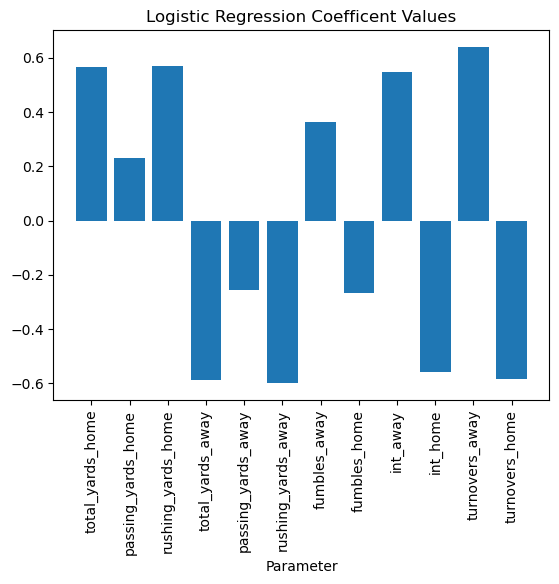

In [11]:
import matplotlib.pyplot as plt

# logistic regression coefficients
fig, ax = plt.subplots()

# hbars = ax.bar(np.arange(len(X)), model.coef_, align='center')
hbars = ax.bar(X, log_model.coef_[0])
plt.xticks(rotation=90)
ax.set_xlabel('Parameter')
ax.set_title('Logistic Regression Coefficent Values')

plt.show()

Next we analyzed the feature importances of the random forest model. We used the Gini Index/Mean Decrease in Impurity for this, which represents how much more homogenous the data becomes after passing through any given decision.

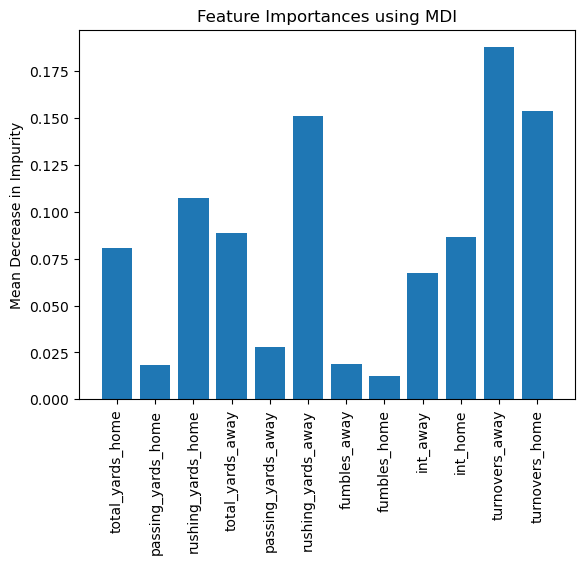

In [12]:
# random forest feature importances
fig, ax = plt.subplots()

hbars = ax.bar(X, rf_model.feature_importances_)
plt.xticks(rotation=90)
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_title('Feature Importances using MDI')

plt.show()

We can also visualize the decision tree model in tree form:

[Text(0.5, 0.9285714285714286, 'x[10] <= -0.069\ngini = 0.492\nsamples = 5357\nvalue = [2337, 3020]'),
 Text(0.25, 0.7857142857142857, 'x[11] <= -0.027\ngini = 0.48\nsamples = 2882\nvalue = [1727, 1155]'),
 Text(0.125, 0.6428571428571429, 'x[3] <= 0.315\ngini = 0.493\nsamples = 1490\nvalue = [658, 832]'),
 Text(0.0625, 0.5, 'x[0] <= -0.773\ngini = 0.413\nsamples = 848\nvalue = [247, 601]'),
 Text(0.03125, 0.35714285714285715, 'x[11] <= -0.783\ngini = 0.466\nsamples = 160\nvalue = [101, 59]'),
 Text(0.015625, 0.21428571428571427, 'x[3] <= -0.43\ngini = 0.46\nsamples = 53\nvalue = [19, 34]'),
 Text(0.0078125, 0.07142857142857142, 'gini = 0.204\nsamples = 26\nvalue = [3, 23]'),
 Text(0.0234375, 0.07142857142857142, 'gini = 0.483\nsamples = 27\nvalue = [16, 11]'),
 Text(0.046875, 0.21428571428571427, 'x[0] <= -1.327\ngini = 0.358\nsamples = 107\nvalue = [82, 25]'),
 Text(0.0390625, 0.07142857142857142, 'gini = 0.056\nsamples = 35\nvalue = [34, 1]'),
 Text(0.0546875, 0.07142857142857142, 'g

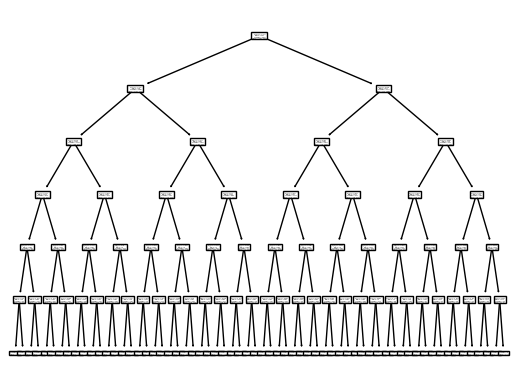

In [13]:
from sklearn import tree

tree.plot_tree(dt_model)

However, even while limiting the tree depth to 6, this is too many decisions to be able to be read. We can therefore also output it as text:

In [14]:
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_10 <= -0.07
|   |--- feature_11 <= -0.03
|   |   |--- feature_3 <= 0.31
|   |   |   |--- feature_0 <= -0.77
|   |   |   |   |--- feature_11 <= -0.78
|   |   |   |   |   |--- feature_3 <= -0.43
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  -0.43
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_11 >  -0.78
|   |   |   |   |   |--- feature_0 <= -1.33
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  -1.33
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.77
|   |   |   |   |--- feature_3 <= -0.54
|   |   |   |   |   |--- feature_2 <= -1.02
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  -1.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  -0.54
|   |   |   |   |   |--- feature_0 <= 0.66
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  0.66
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0

From this, we can see that feature 10 is at the top of the tree, meaning that it is most indicative of deciding which team wins. Looking at our variable X, we find that feature 10 is turnovers_away. This feature may have been chosen to be the top of the tree because this datapoint is frequently 0, while any deviation from 0 can very heavily swing the results of a game. feature 11, turnovers_home, is second to the top, and essentially the same data for the other team. In comparison, the innermost decision features are not consistent between branches.

turnovers_away is also given the greatest weight in the logistic regression, as well as the greatest feature importance in random forest. This shows that the models all learned similar relative importance of the most impactful variables. 

Overall, the models were all similarly effective at predicting NFL game wins, but nonetheless effective. The testing accuracy of all six models only ranged between 0.76 and 0.81, a very narrow range, but random forest performed the best and k-nearest neighbors performed the worst. The training accuracies were also all just slightly above the testing accuracies of each model, suggesting that we are neither significantly undertraining nor overtraining.

We can therefore conclude that the impact of the variables we looked at are relatively linear in relation to a team's chances of winning since linear and nonlinear prediction methods perform comparably. However, the combination of variables we used are not able to completely determine the outcome of a game under any prediction method.

## Future Work
The main shortcoming of our project is that we are only able to predict the result of a game using the data that came from the game itself. Our model is not able to use existing data to predict future game results. One area of improvement for this project is to utilize individual player statistics to determine the overall effectiveness of a team. Using this information, we can potentially predict wins and losses for games that have yet to be played. 

There also exist dozens of advanced statistics such as first down percentage, yards lost to tackles, yards lost to sacks, and pass completion percentage that we did not utilize for this project. Even though there is less evidence that these statistics affect the outcome of the game, we believe that more data in general will help train our model to be more accurate.


## Citations
- https://fivethirtyeight.com/methodology/how-our-nfl-predictions-work/
- https://www.legalsportsbetting.com/how-much-money-do-americans-bet-on-sports/
- https://www.kaggle.com/datasets/cviaxmiwnptr/nfl-team-stats-20022019-espn